In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px


In [13]:
filepath = r'D:\infosys_spring\anomaly-detection-project\dataset\anomaly_data.csv'
df = pd.read_csv(filepath)
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [15]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [16]:
df.shape

(24123, 12)

In [17]:
df.isna().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [18]:
df['Acc'] = df['Acc'].fillna(df['Acc'].mean()) 


In [19]:
print(df.isnull().sum())


timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64


In [20]:
df.head()


,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


(label2
 normal     17152
 anomaly     6971
 Name: count, dtype: int64,
 <Axes: ylabel='count'>)

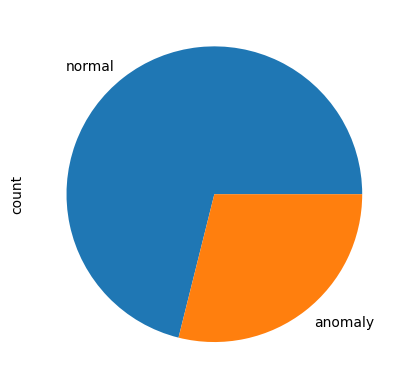

In [21]:
df['label2'].value_counts(),df['label2'].value_counts().plot(kind='pie',)

<Figure size 1500x1000 with 0 Axes>

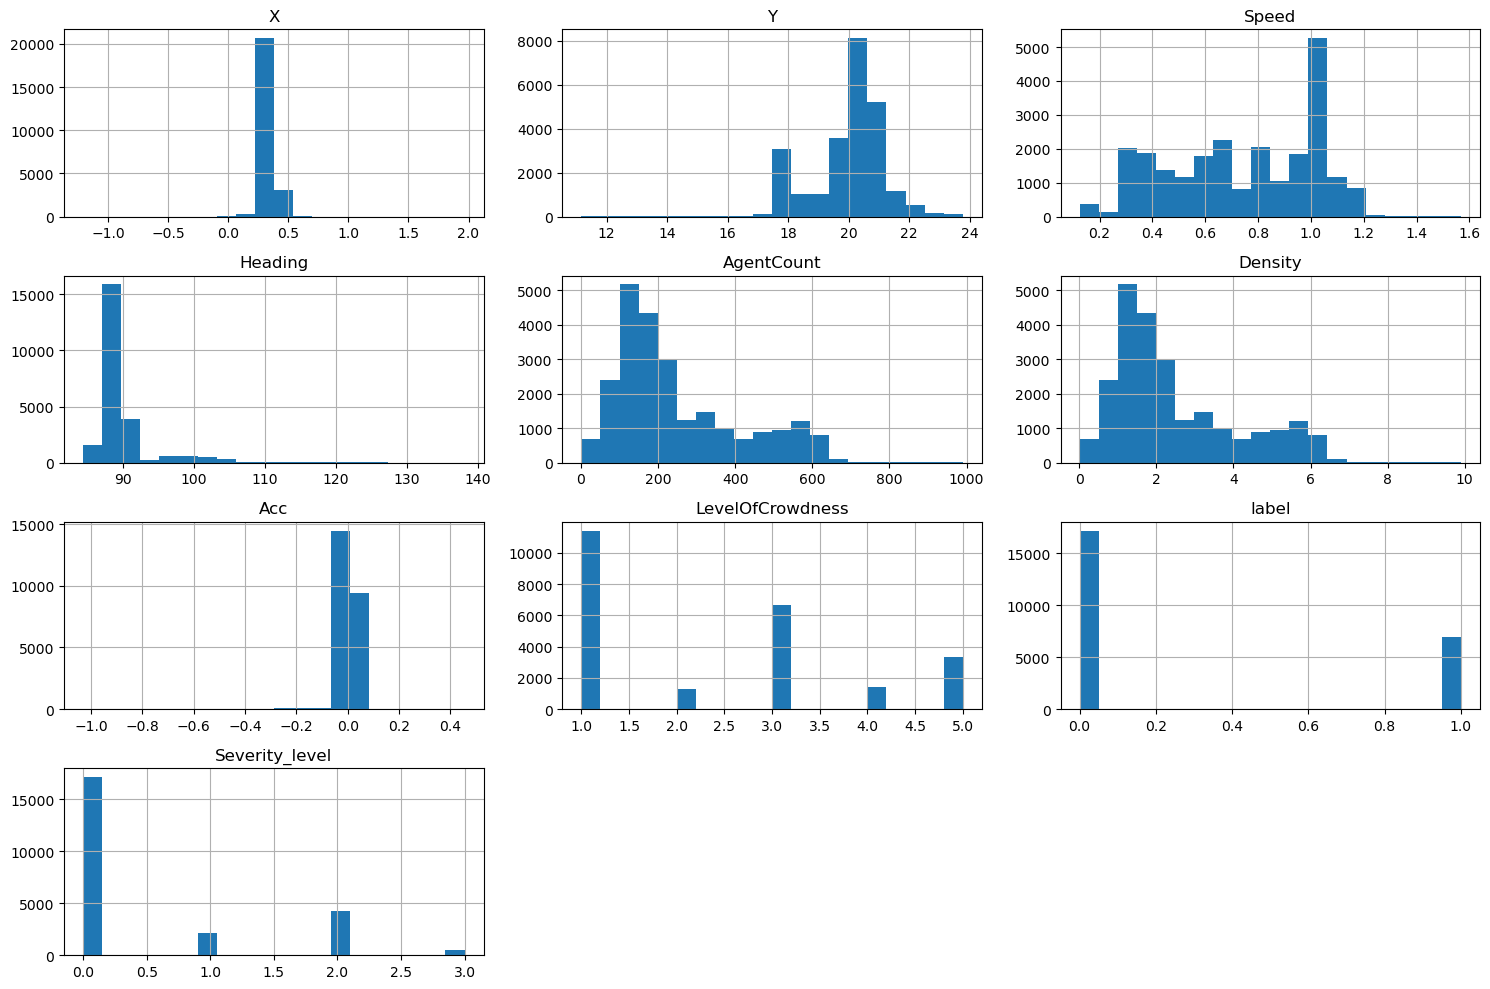

In [22]:
numeric_data = df.select_dtypes(include=[float, int])
# 1. Histograms for Numerical Features
plt.figure(figsize=(15, 10))
numeric_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

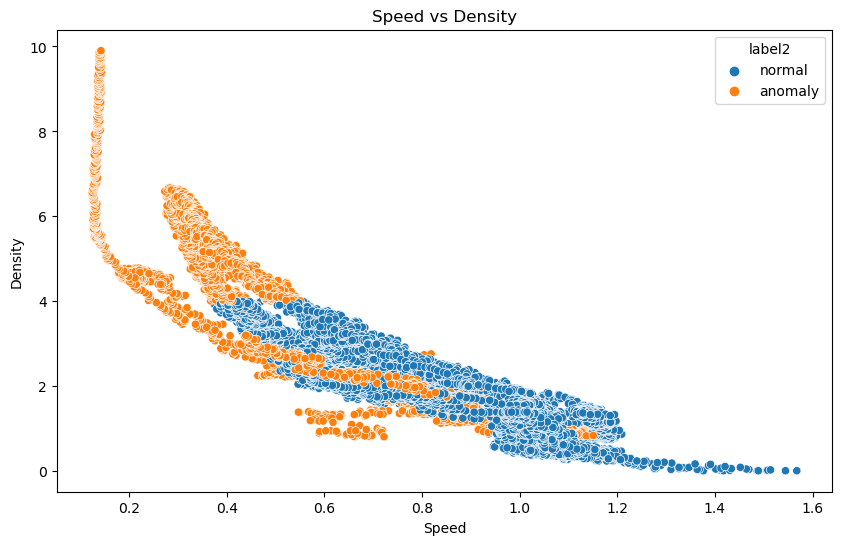

In [23]:
# Scatter plot: Speed vs Density
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed', y='Density', hue='label2', data=df)
plt.title('Speed vs Density')
plt.show()

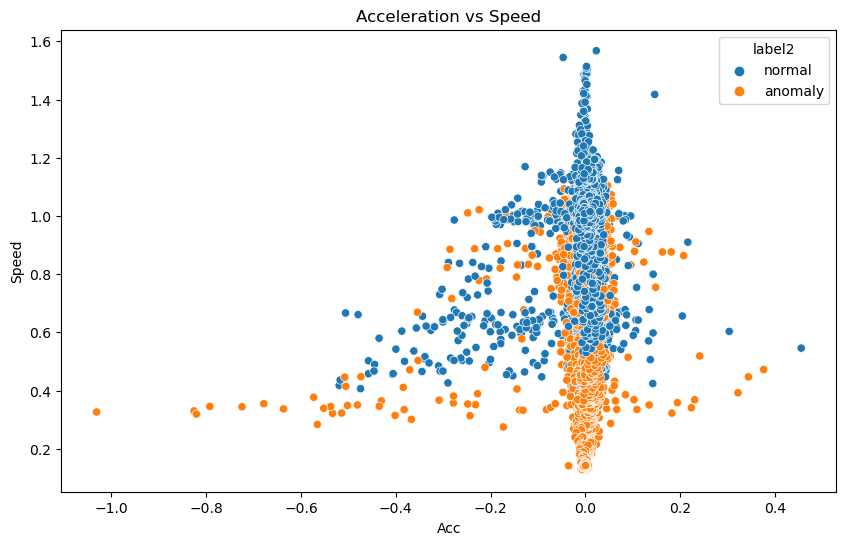

In [24]:
#Scatter plot: Acceleration vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acc', y='Speed', hue='label2', data=df)
plt.title('Acceleration vs Speed')
plt.show()

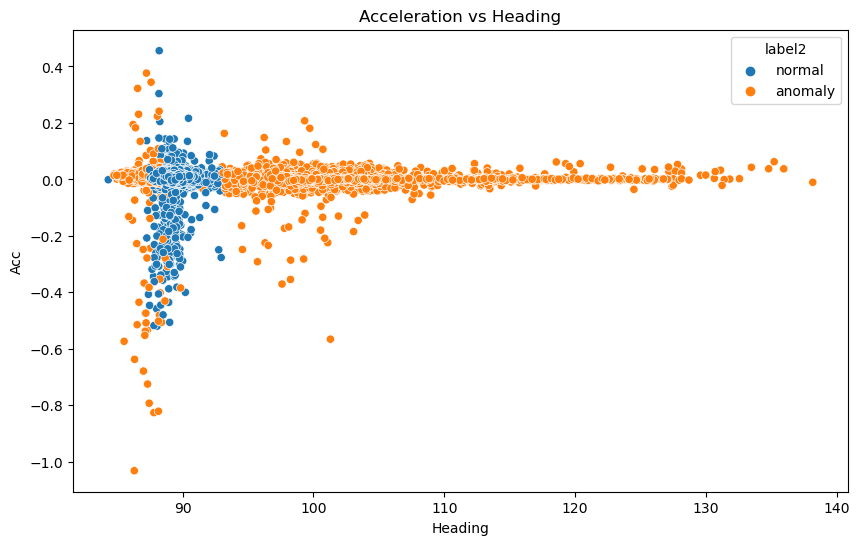

In [25]:
#Scatter plot: Acceleration vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heading', y='Acc', hue='label2', data=df)
plt.title('Acceleration vs Heading')
plt.show()

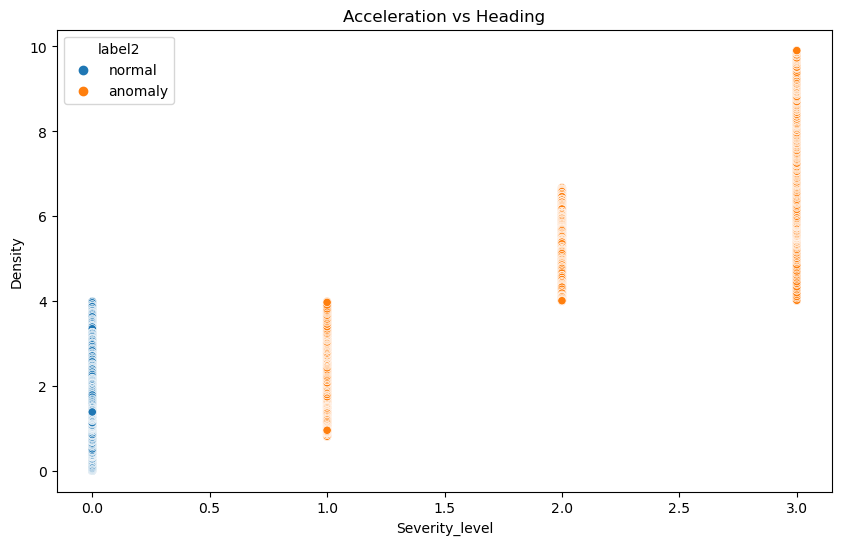

In [26]:
#Scatter plot: Acceleration vs Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Severity_level', y='Density', hue='label2', data=df)
plt.title('Acceleration vs Heading')
plt.show()

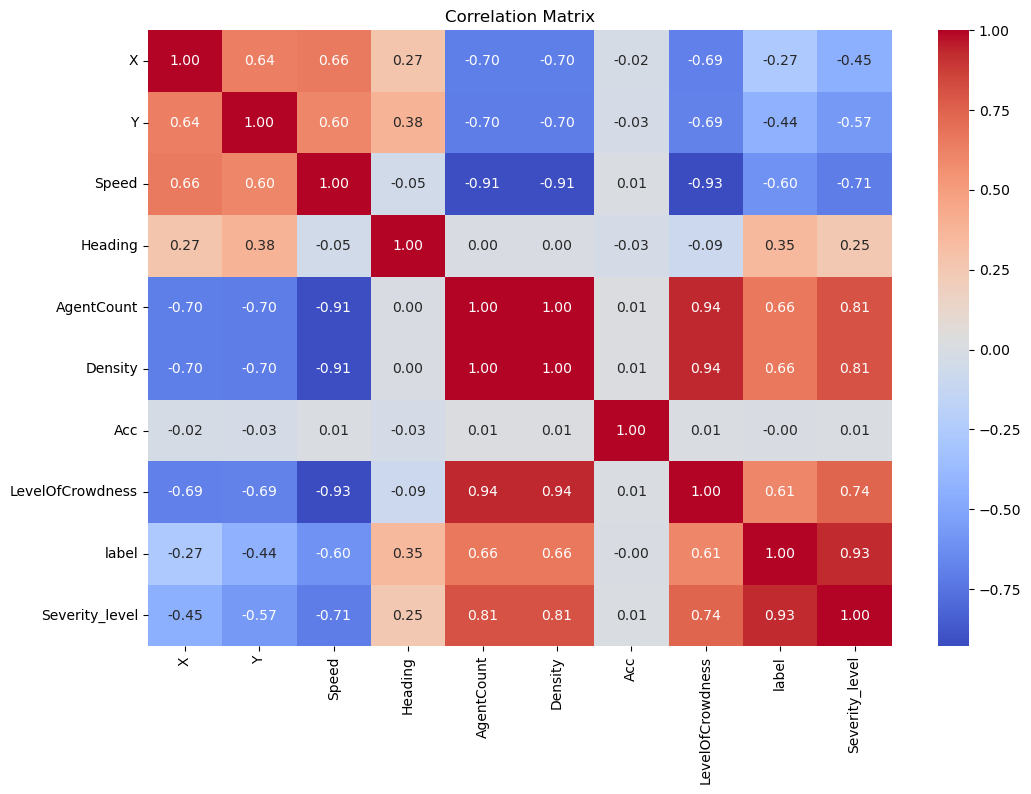

In [27]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

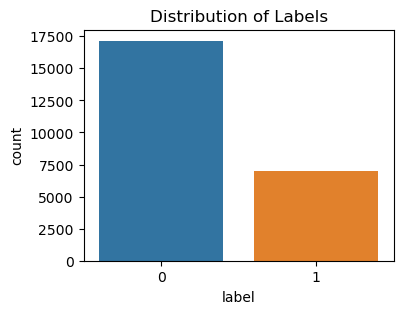

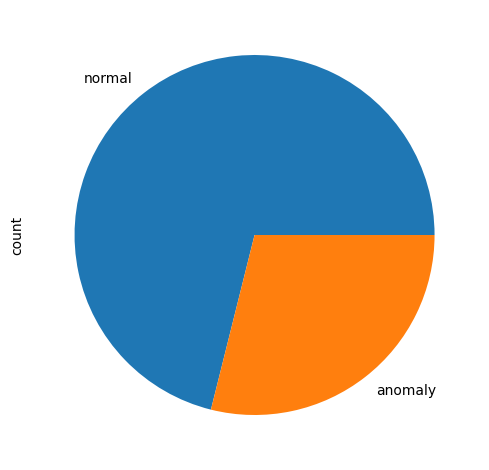

In [28]:
# Bar plot for distribution of labels
plt.figure(figsize=(4,3))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()
df['label2'].value_counts(),df['label2'].value_counts().plot(kind='pie',)
plt.tight_layout()


c:\Users\mustufa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


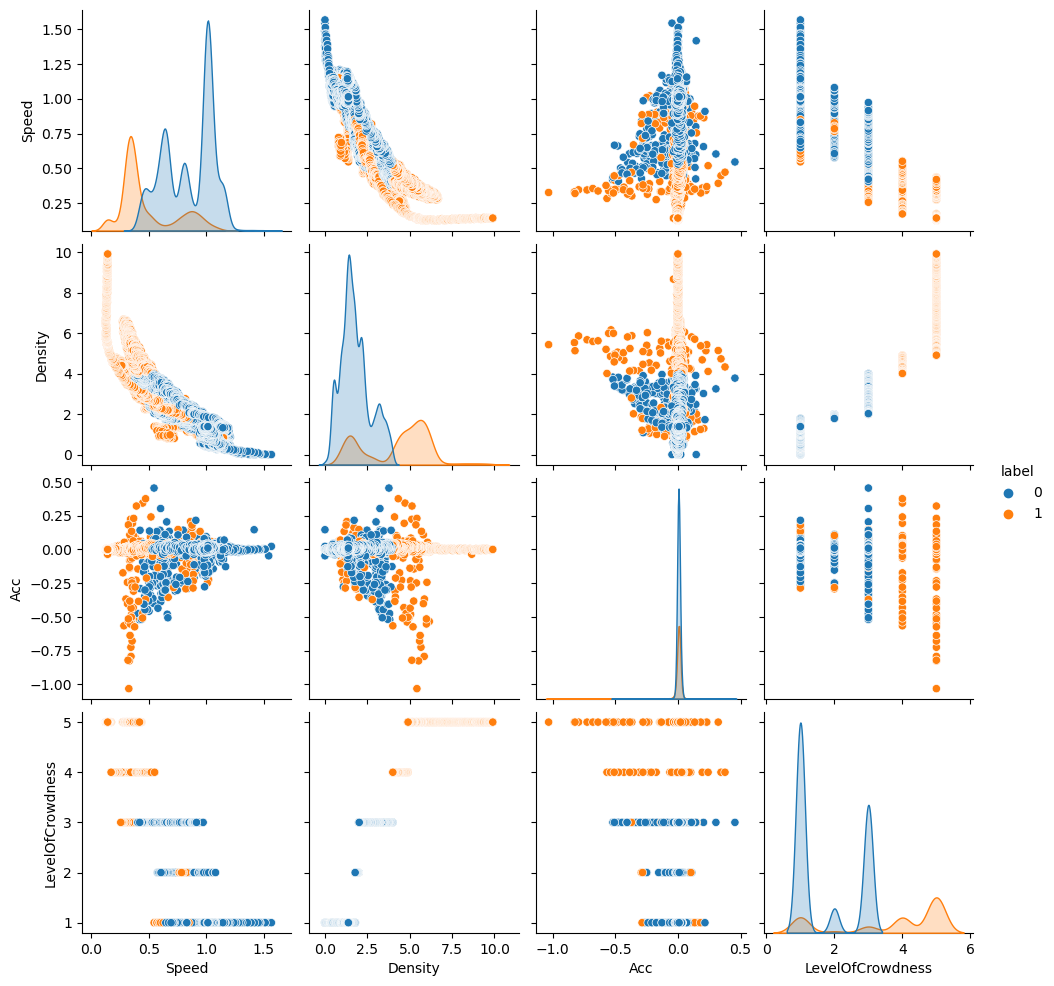

In [29]:
# Pair plot for selected features
sns.pairplot(df[['Speed', 'Density', 'Acc', 'LevelOfCrowdness', 'label']], hue='label')
plt.show()


In [30]:

# 6. Box Plots for Numerical Features Grouped by Label
feat = ['Speed', 'Density', 'Acc', 'LevelOfCrowdness',]
plt.figfigsize=(15, 10))

for i, feature in enumerate(feat, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} by Label')

plt.tight_layout()
plt.show()

SyntaxError: unmatched ')' (4104314010.py, line 3)

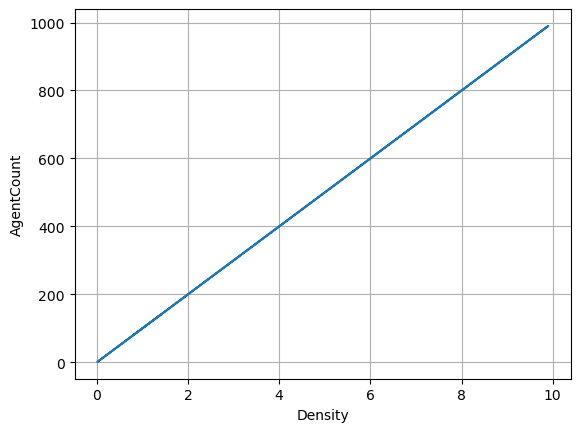

In [ ]:

plt.plot(df['Density'],df['AgentCount'])
plt.xlabel('Density')
plt.ylabel('AgentCount')
plt.grid()
plt.show()

In [ ]:
# # Creating figure
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
# plt.xlabel('X')
# plt.ylabel('Y')
# # Creating plot
# ax.scatter3D(df['X'], df['Y'],df['label'])
# plt.title("simple 3D scatter plot")
 
# # show plot
# plt.show()

In [ ]:
# Function to convert datetime.time to seconds
def convert_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

# Assuming 'timestamp' is in datetime.time format
df['elapsed_seconds'] = df['timestamp'].apply(convert_to_seconds)

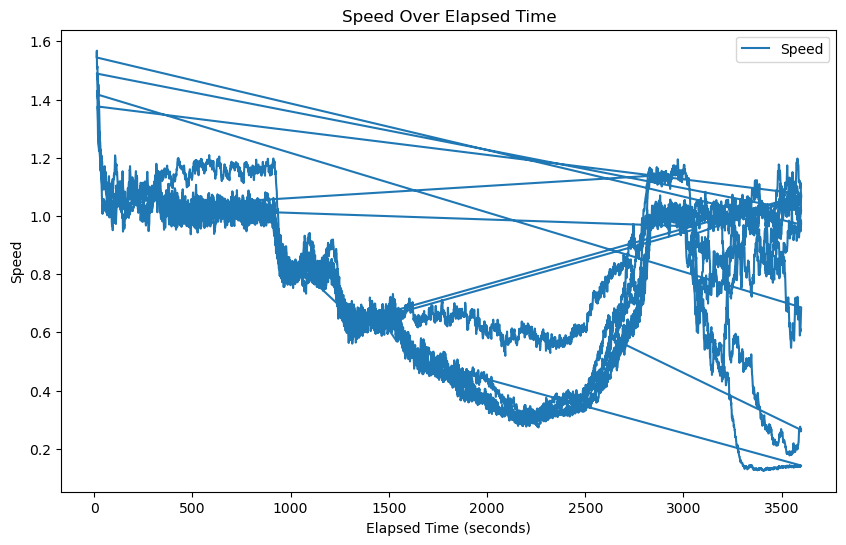

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df['elapsed_seconds'], df['Speed'], label='Speed')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Speed')
plt.title('Speed Over Elapsed Time')
plt.legend()
plt.show()

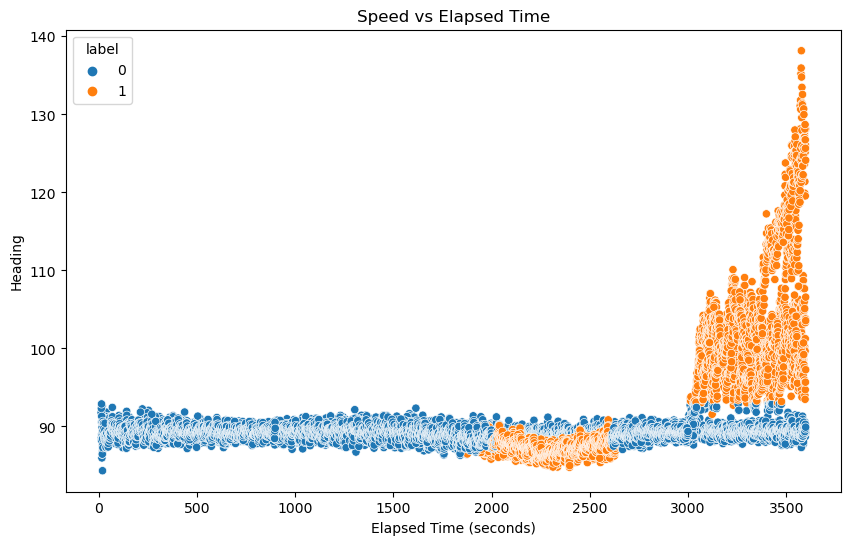

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='elapsed_seconds', y='Heading', hue='label', data=df)
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Heading')
plt.title('Speed vs Elapsed Time')
plt.show()


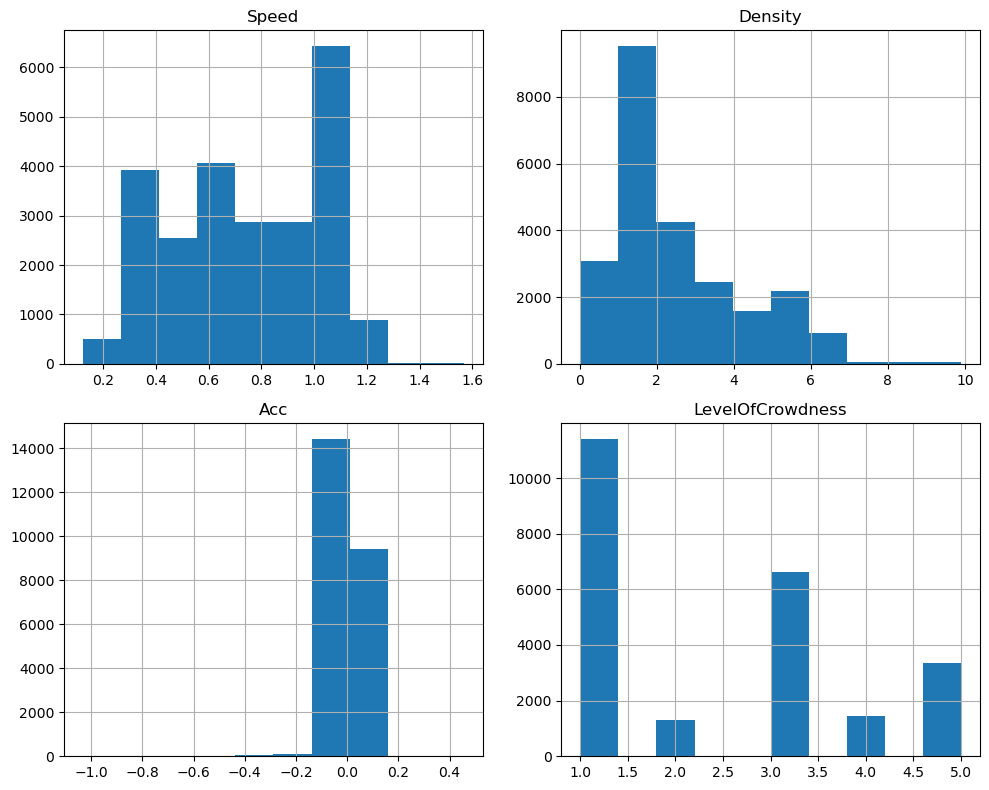

In [ ]:
df[['Speed', 'Density', 'Acc', 'LevelOfCrowdness']].hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

TypeError: clustermap() missing 1 required positional argument: 'data'

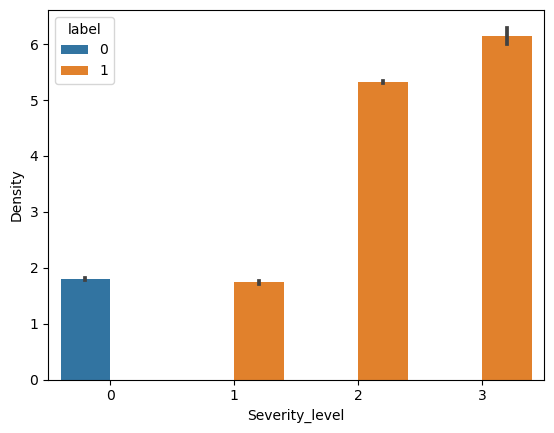

In [ ]:
# plt.figure(figsize=(8, 6))
# # sns.countplot(x='Severity_level', data=df,hue='label')
# plt.title('Distribution of Labels')
# plt.show()
sns.barplot(x='Severity_level', y='Density',data=df,hue='label')
sns.clustermap()

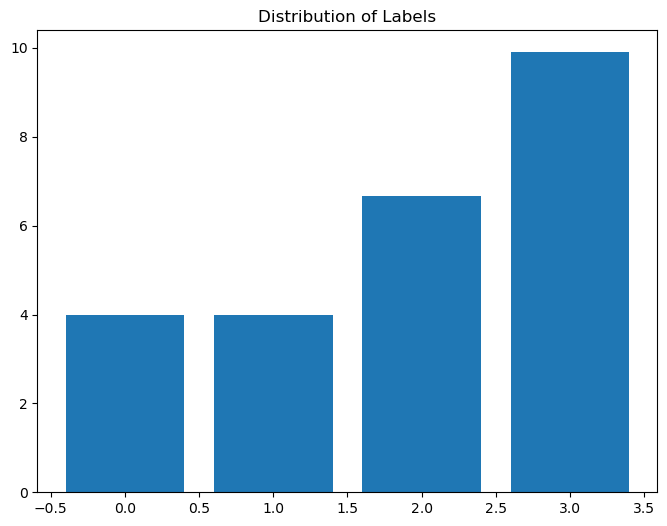

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df['Severity_level'],df['Density'])
plt.title('Distribution of Labels')
plt.show()

<Axes: xlabel='Acc'>

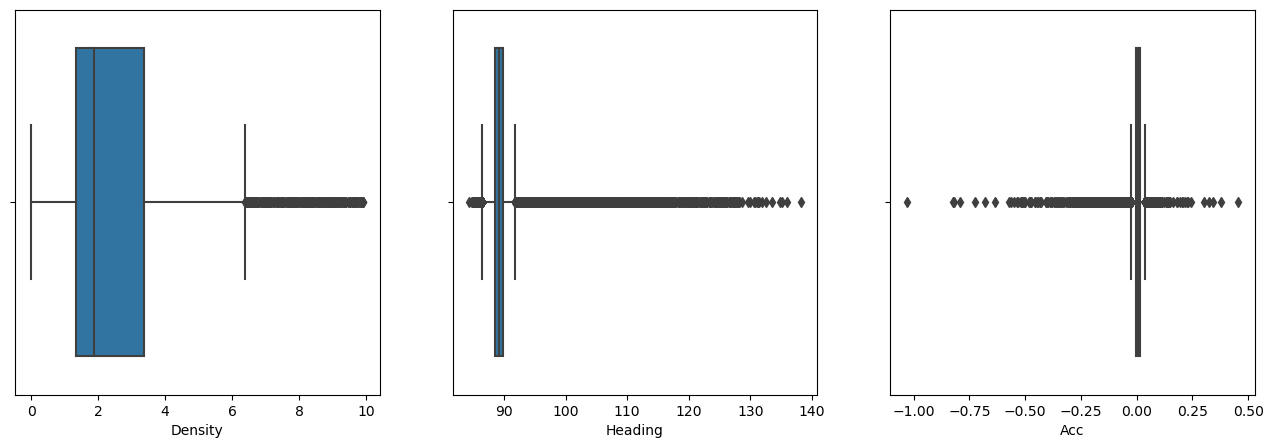

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=df["Density"])
plt.subplot(1,3,2)
sns.boxplot(x=df["Heading"])
plt.subplot(1,3,3)
sns.boxplot(x=df["Acc"])

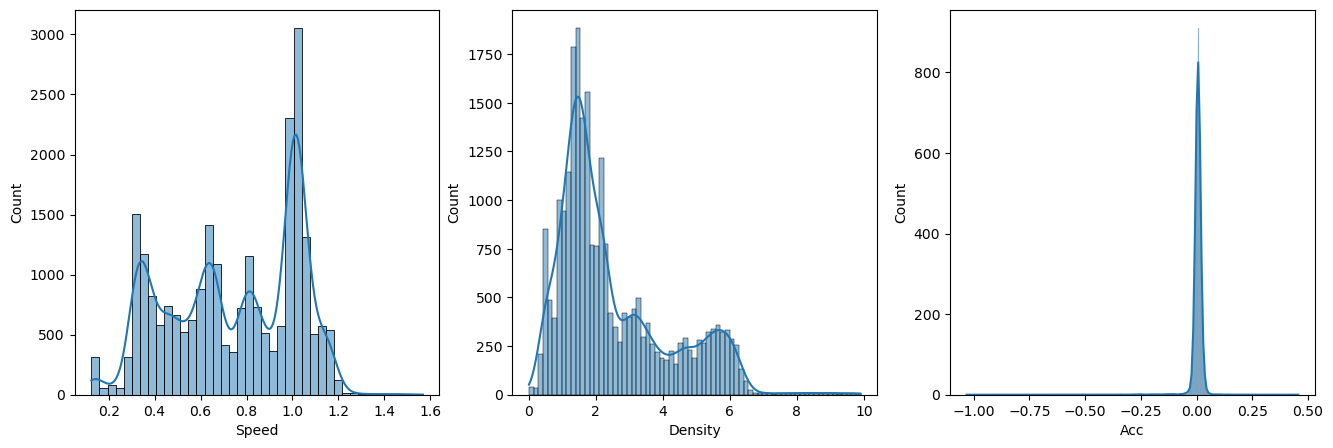

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df['Speed'], kde=True)

plt.subplot(1,3,2)
sns.histplot(df['Density'], kde=True)

plt.subplot(1,3,3)
sns.histplot(df['Acc'], kde=True)

plt.show()

In [32]:
percentile25 = df['Density'].quantile(0.25)
percentile75 = df['Density'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  3.36
25th quartile:  1.34


In [33]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  2.0199999999999996


In [34]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 6.389999999999999
Lower limit -1.6899999999999993


In [35]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
outliers = find_outliers_IQR(df['Speed'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Speed, dtype: float64)

In [31]:
print(df.isnull().sum())
print(df.columns)

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
dtype: int64
Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


X = df.drop(columns=['timestamp', 'AgentCount', 'label', 'label2'])
y = df['label'] 

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)







In [ ]:
features=df.drop(columns=(['timestamp','AgentCount','label','label2']))
target = df['label']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

IndexingError: Too many indexers